## Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os
from keras.applications.resnet50 import ResNet50
# from keras.applications.resnet8 import ResNet8
# from keras.applications.resnet150 import ResNet150

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T03'

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
path_drive='./output'

## Database: BloodMNIST




### Connect with database

In [ ]:
!pip install medmnist

In [ ]:
from medmnist import BloodMNIST, INFO, Evaluator

### Collect specific dataset to train, test and validation

In [ ]:
# distinct labels classifications
dict_classes= {
  '0': 'basophil',
  '1': 'eosinophil',
  '2': 'erythroblast',
  '3': 'immature granulocytes',
  '4': 'lymphocyte',
  '5': 'monocyte',
  '6': 'neutrophil',
  '7': 'platelet'
 }

In [ ]:
size_dimension= 28

data_train= BloodMNIST(split="train", download=True, size=size_dimension)
data_val=   BloodMNIST(split="val", download=True, size=size_dimension)
data_test=  BloodMNIST(split="test", download=True, size=size_dimension)

Using downloaded and verified file: C:\Users\isabe\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\isabe\.medmnist\bloodmnist.npz
Using downloaded and verified file: C:\Users\isabe\.medmnist\bloodmnist.npz


In [ ]:
## split the datasets
X_train, y_train= data_train.imgs, data_train.labels
X_val, y_val= data_val.imgs, data_val.labels
X_test, y_test= data_test.imgs, data_test.labels

In [ ]:
X_train[0]

array([[[250, 223, 206],
        [255, 229, 212],
        [251, 222, 206],
        ...,
        [255, 238, 195],
        [251, 230, 185],
        [255, 234, 191]],

       [[255, 229, 210],
        [255, 229, 210],
        [244, 215, 199],
        ...,
        [254, 232, 193],
        [254, 233, 190],
        [255, 242, 201]],

       [[255, 231, 208],
        [255, 227, 205],
        [238, 210, 189],
        ...,
        [255, 233, 202],
        [251, 229, 192],
        [255, 242, 203]],

       ...,

       [[233, 204, 172],
        [239, 210, 180],
        [245, 218, 188],
        ...,
        [255, 225, 199],
        [255, 226, 200],
        [255, 228, 199]],

       [[215, 184, 156],
        [218, 188, 160],
        [228, 198, 170],
        ...,
        [255, 225, 201],
        [254, 227, 200],
        [255, 228, 201]],

       [[217, 182, 162],
        [212, 180, 159],
        [213, 181, 158],
        ...,
        [254, 226, 204],
        [255, 227, 203],
        [255, 228, 201]]

In [ ]:
# it's always better to normalize
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# Reshape to be [samples][width][height][channels]
size_dimension_updated= 32          ## resnet apply this dimension

# resize the input shape , i.e. old shape: 28, new shape: 32
X_train = tf.image.resize(X_train, [size_dimension_updated, size_dimension_updated]) # if we want to resize
X_val = tf.image.resize(X_val, [size_dimension_updated, size_dimension_updated])
X_test = tf.image.resize(X_test, [size_dimension_updated, size_dimension_updated])

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train , num_classes=8)
y_val = tf.keras.utils.to_categorical(y_val , num_classes=8)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=8)

# y_train = y_train.flatten()
# y_val = y_val.flatten()
# y_test = y_test.flatten()

### Visualizing the actual data

In [ ]:
# y_train.replace(dict_classes)
print(y_train.ravel())
a= [dict_classes[str(i)] for i in y_train.ravel()]
print(a)

[0. 0. 0. ... 0. 0. 0.]


KeyError: '0.0'

NameError: name 'a' is not defined

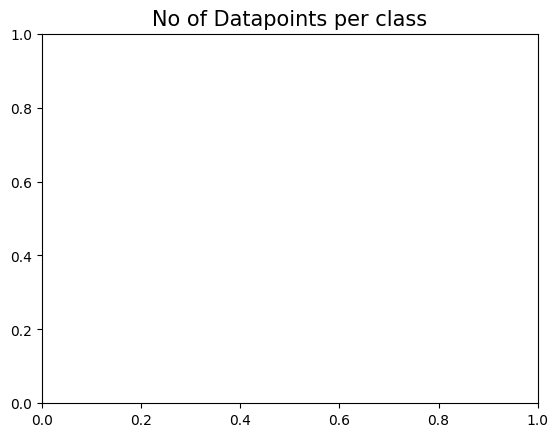

In [ ]:
plt.title('No of Datapoints per class', fontsize=15)
sns.countplot(a)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('No of Datapoints', fontsize=15)
plt.xticks()
plt.savefig(f'{path_drive}/NDatapointsPerClass.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/NDatapointsPerClass.png', format='png', bbox_inches="tight")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './output/fig_train_images.eps'

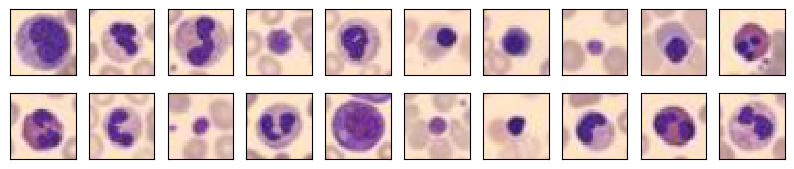

In [ ]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(10, 2))
# plt.title('Original Train Images', fontsize=15)
ind = 1
for i in range(1, 3, 1):
    for j in range(1, 11, 1):
        fig.add_subplot(2, 10, ind)
        plt.imshow(X_train[ind], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1
# plt.set_axis_off()
plt.savefig(f'{path_drive}/fig_train_images.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/fig_train_images.png', format='png', bbox_inches="tight")
plt.show()

## Functions and definitions

### Creation of Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_conf_matrix(y_test=[], pred_lr=[], title="Logistic Regression (newton-cg)", show_plot=True, cm=[],  details="", path_compl="" ):
  # Get the confusion matrix
  if len(cm) == 0:
    cm = confusion_matrix(y_test.flatten(), pred_mlp2.flatten())

  class_names = ['basophil', 'eosinophil', 'erythroblast', 'immature granulocytes', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

  # Add labels and title
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("Actual", fontsize=14)
  plt.title(f'Confusion Matrix for {title}', fontsize=16)

  # Save the plot
  plt.savefig(f'{path_drive}/ResNet/{path_compl}_fig_cm_{details}.eps', format='eps', bbox_inches="tight")
  plt.savefig(f'{path_drive}/ResNet/{path_compl}_fig_cm_{details}.png', format='png', bbox_inches="tight")

  # Show the plot
  if show_plot:
    plt.show()

### Training Resnet

Camadas aplicadas:
- Resnet50
- Flatten()
- Dense(1024)
- Dense(8)

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

def setup_RESNET_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  model = tf.keras.models.Sequential()

  print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')


  model.add(ResNet50(weights = 'imagenet', include_top = False, classes=8, input_shape = (32,32,3)))

  model.add(layers.Flatten())
  model.add(layers.Dense(units, activation=activation))
  model.add(layers.Dropout(drop_out))
  model.add(layers.Dense(8, activation = 'softmax'))

  model.layers[0].trainable = False

  model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = ['categorical_accuracy'],
          optimizer = tf.keras.optimizers.Adam()
          )

  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)

  # present the structure of model initialized
  model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
#   model_json = model.to_json()
#   dir_path = f'{path_drive}/ResNet'
#   name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
#   json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
#   json_file.write(model_json)
#   json_file.close()
#   model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

## Evaluate results

### Execution 01

evaluate the setup_RESNET_mode function, that it has a Dense layer

In [ ]:
ret, ret_model, ret_hist = setup_RESNET_model(units=512, drop_out=0, batch_size=64, epochs=5, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=<CategoricalAccuracy name=categorical_accuracy> of type <class 'keras.src.metrics.accuracy_metrics.CategoricalAccuracy'>

### Drafts to verify the variable contents

In [ ]:
np.argmax(ret_model.predict(X_test), axis = 1).flatten()

107/107 [==============================] - 2s 10ms/step


array([1, 1, 1, ..., 1, 3, 7])

In [ ]:
ret_model.predict(X_test)

107/107 [==============================] - 1s 9ms/step


array([[2.9166993e-02, 4.0609434e-01, 2.8066412e-03, ..., 9.2047513e-02,
        2.6902774e-01, 1.7321906e-04],
       [1.0049328e-01, 5.0035959e-01, 7.0002378e-04, ..., 1.2159429e-01,
        1.0441568e-02, 1.1479883e-06],
       [5.9988890e-02, 4.0412715e-01, 9.8183556e-03, ..., 7.0523813e-02,
        2.2133058e-01, 5.4152752e-05],
       ...,
       [5.1924948e-02, 3.4629035e-01, 1.1376914e-02, ..., 9.8528050e-02,
        1.9407746e-01, 1.4531198e-04],
       [3.3141904e-02, 2.4373661e-01, 8.0918957e-04, ..., 3.0715829e-01,
        3.6478400e-02, 2.9129881e-04],
       [4.8358086e-04, 6.2118010e-03, 3.4991086e-01, ..., 1.4600983e-03,
        2.5722334e-01, 3.6650798e-01]], dtype=float32)

In [ ]:
ret_model.predict(X_test).size

107/107 [==============================] - 18s 167ms/step


27368

In [ ]:
y_test.flatten().size

27368

In [ ]:
np.argmax(y_test, axis = 1).flatten()

array([3, 0, 1, ..., 3, 1, 7])

In [ ]:
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())

107/107 [==============================] - 23s 208ms/step


In [ ]:
print(cm2)

[[  0   0   0   1   0 104   0 139]
 [  0   0   0   0   0   3   0 621]
 [  0   1   6   0   0  13   0 291]
 [  0   0   0   1   0 149   0 429]
 [  0   0   0   0   0   1   0 242]
 [  0   0   0   0   0 128   0 156]
 [  0   2   0   0   0   1   0 663]
 [  0 118   0   0   0   0   0 352]]


In [ ]:
plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"_units_1024_epoch_5_batch_size_64_n_test_0_optimizer_Adam")

107/107 [==============================] - 1s 9ms/step


NameError: name 'cm2' is not defined

### Execution 02

Considering the tests values of hyperparameters

- Units = 1024
- Batch size = 64
- epochs = 5

In [ ]:
ret2, ret_model2, ret_hist2 = setup_RESNET_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')


kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5
Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - categorical_accuracy: 0.2685 - loss: 2.1939 - val_categorical_accuracy: 0.4585 - val_loss: 1.4132
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_accuracy: 0.4975 - loss: 1.3531 - val_categorical_accuracy: 0.5701 - val_loss: 1.1502
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - categorical_accuracy: 0.5340 - loss: 1.2352 - val_categorical_accuracy: 0.5567 - val_loss: 1.2800
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5670 - loss: 1.1500 - val_categorical_accuracy: 0.5648 - val_loss: 1.0968
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5883 - loss: 1.0950 - val_categorical_accuracy: 0.5952 - val_loss: 1.0305


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,906,842 (114.09 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,212,754 (16.07 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - categorical_accuracy: 0.5677 - loss: 1.1052
test loss, test acc: [1.0695931911468506, 0.5904706120491028]
Model saved to disk


In [ ]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred = ret_model2.predict(X_test)
subset_y_pred_flatten = np.argmax(subset_y_pred, axis = 1).flatten()

difs_list = subset_y_pred_flatten - np.argmax(y_test, axis = 1).flatten()
difs_list = np.where(difs_list != 0)[0]
print(difs_list)

subset_x_test = []
subset_y_test = []
for i in range(0, 6, 1):
  subset_x_test.append( X_test[difs_list[i]] )
  subset_y_test.append( np.argmax(y_test, axis = 1).flatten()[difs_list[i]] )

print(subset_y_pred)
print(subset_y_test)


107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step
[   1    2    3 ... 3416 3419 3420]
[[5.3475183e-02 3.2478184e-01 1.1000506e-03 ... 1.0532697e-01
  1.0151163e-01 2.7996884e-05]
 [1.5919334e-01 2.6733902e-01 1.9005610e-04 ... 1.3643958e-01
  2.6940259e-03 2.0693440e-07]
 [1.0356576e-01 3.0698979e-01 3.7460264e-03 ... 7.8327440e-02
  8.0919877e-02 9.4642155e-06]
 ...
 [8.9663066e-02 2.4022165e-01 3.7650084e-03 ... 1.0537986e-01
  6.0185049e-02 2.0869311e-05]
 [4.8991233e-02 1.3357246e-01 2.3578902e-04 ... 2.8098735e-01
  8.0363769e-03 3.1175976e-05]
 [9.8513393e-04 5.4199686e-03 4.7281969e-01 ... 2.8792594e-03
  2.5193131e-01 2.3694004e-01]]
[0, 1, 3, 1, 1, 1]


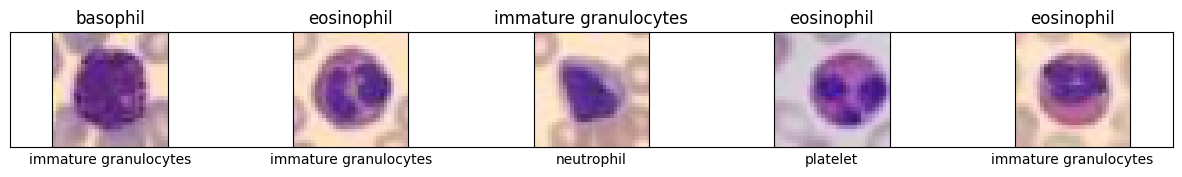

In [ ]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

path_drive = './Imagens'
for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j-1]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        # print(str(subset_y_test2[j]))
        plt.title(f'{dict_classes[str(subset_y_test[j-1])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred_flatten[difs_list[j-1]])]}')
        # print(subset_y_pred2_flatten[difs_list[j-1]])
# plt.set_axis_off()
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_5epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_5epochs.png', format='png', bbox_inches="tight")
plt.show()

In [ ]:
ret2 = [23.501379013061523, 0.15258696675300598]

In [ ]:
y_test.shape

(3421, 8)

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step


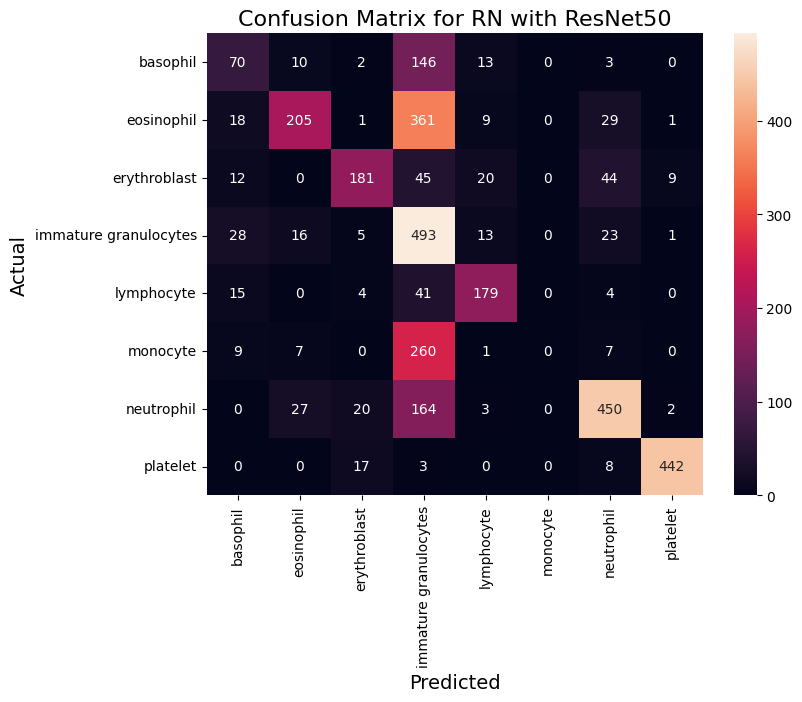

In [ ]:
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model2.predict(X_test), axis = 1).flatten())
plot_conf_matrix(y_test.flatten(), np.argmax(ret_model2.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"_units_1024_epoch_15_batch_size_64_n_test_0_optimizer_Adam")

### Execution 03

- Unit = 1024
- Batch size = 64
- Epoch = 5


In [ ]:
ret3, ret_model3, ret_hist3 = setup_RESNET_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')



kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=5
Epoch 1/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - categorical_accuracy: 0.2745 - loss: 2.0576 - val_categorical_accuracy: 0.4246 - val_loss: 1.4083
Epoch 2/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_accuracy: 0.4712 - loss: 1.3996 - val_categorical_accuracy: 0.5076 - val_loss: 1.2066
Epoch 3/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - categorical_accuracy: 0.5442 - loss: 1.2268 - val_categorical_accuracy: 0.5800 - val_loss: 1.1034
Epoch 4/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5683 - loss: 1.1379 - val_categorical_accuracy: 0.5672 - val_loss: 1.1037
Epoch 5/5
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5911 - loss: 1.1014 - val_categorical_accuracy: 0.6221 - val_loss: 1.0047


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,906,842 (114.09 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,212,754 (16.07 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - categorical_accuracy: 0.5955 - loss: 1.0757
test loss, test acc: [1.0374641418457031, 0.6132709980010986]
Model saved to disk


In [ ]:
ret3

[9.739662170410156, 0.1423560380935669]

107/107 [==============================] - 15s 137ms/step


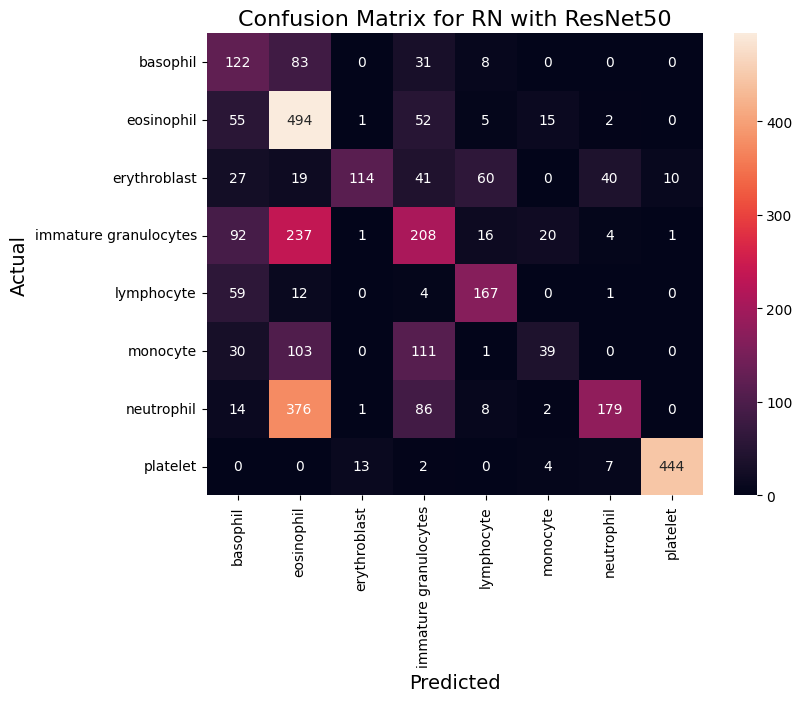

In [ ]:
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model3.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model3.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoTraining_units_1024_epoch_5_batch_size_64_n_test_0_optimizer_Adam")

### Execution 04

- Unit = 1024
- Batch size = 64
- Epoch = 15

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=15
Epoch 1/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - categorical_accuracy: 0.2814 - loss: 2.0810 - val_categorical_accuracy: 0.4182 - val_loss: 1.3998
Epoch 2/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - categorical_accuracy: 0.4909 - loss: 1.3481 - val_categorical_accuracy: 0.5129 - val_loss: 1.2437
Epoch 3/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - categorical_accuracy: 0.5377 - loss: 1.2254 - val_categorical_accuracy: 0.6046 - val_loss: 1.0525
Epoch 4/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - categorical_accuracy: 0.5597 - loss: 1.1606 - val_categorical_accuracy: 0.5485 - val_loss: 1.0816
Epoch 5/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5903 - loss: 1.1000 - val_categorical_accuracy: 0.5333 - val_loss: 1.1667
Epoch 6/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 85ms/step - categorical_ac

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,906,842 (114.09 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,212,754 (16.07 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - categorical_accuracy: 0.5946 - loss: 1.0336
test loss, test acc: [1.0026575326919556, 0.6053785681724548]
Model saved to disk
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step


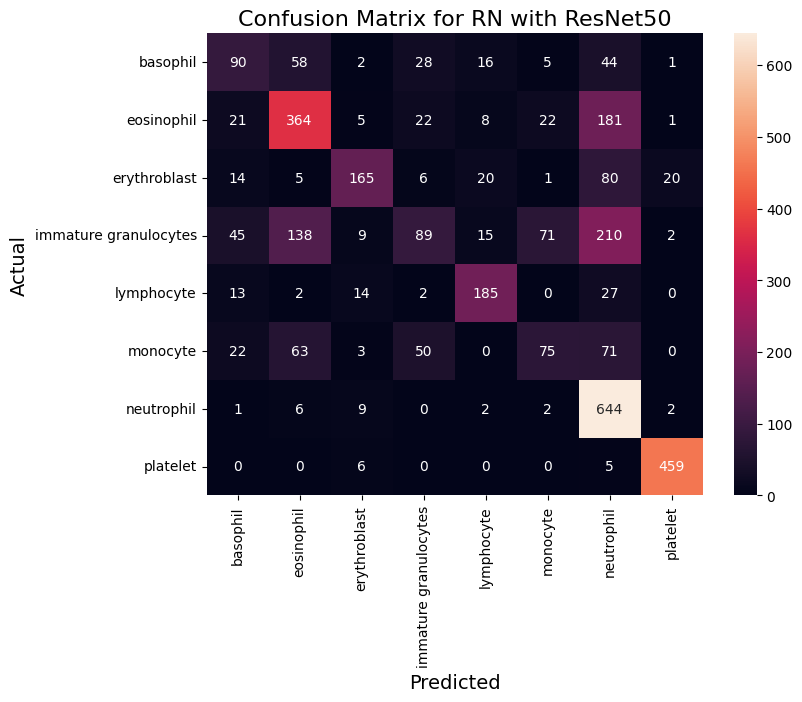

In [ ]:
ret4, ret_model4, ret_hist4 = setup_RESNET_model(units=1024, drop_out=0, batch_size=64, epochs=15, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model4.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model4.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoTraining_units_1024_epoch_15_batch_size_64_n_test_0_optimizer_Adam")

### Execution 05 - 30 epochs


- Unit = 1024
- Batch size = 64
- Epoch = 30

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=64, Epochs=30
Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - categorical_accuracy: 0.2797 - loss: 2.1935 - val_categorical_accuracy: 0.4994 - val_loss: 1.3434
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - categorical_accuracy: 0.4907 - loss: 1.3518 - val_categorical_accuracy: 0.5479 - val_loss: 1.1871
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - categorical_accuracy: 0.5325 - loss: 1.2153 - val_categorical_accuracy: 0.5806 - val_loss: 1.1435
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_accuracy: 0.5388 - loss: 1.1887 - val_categorical_accuracy: 0.5940 - val_loss: 1.0924
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_accuracy: 0.5946 - loss: 1.0814 - val_categorical_accuracy: 0.5829 - val_loss: 1.0380
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - categorical_ac

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,906,842 (114.09 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,212,754 (16.07 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - categorical_accuracy: 0.6557 - loss: 0.9221
test loss, test acc: [0.8972343802452087, 0.6635486483573914]
Model saved to disk
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step


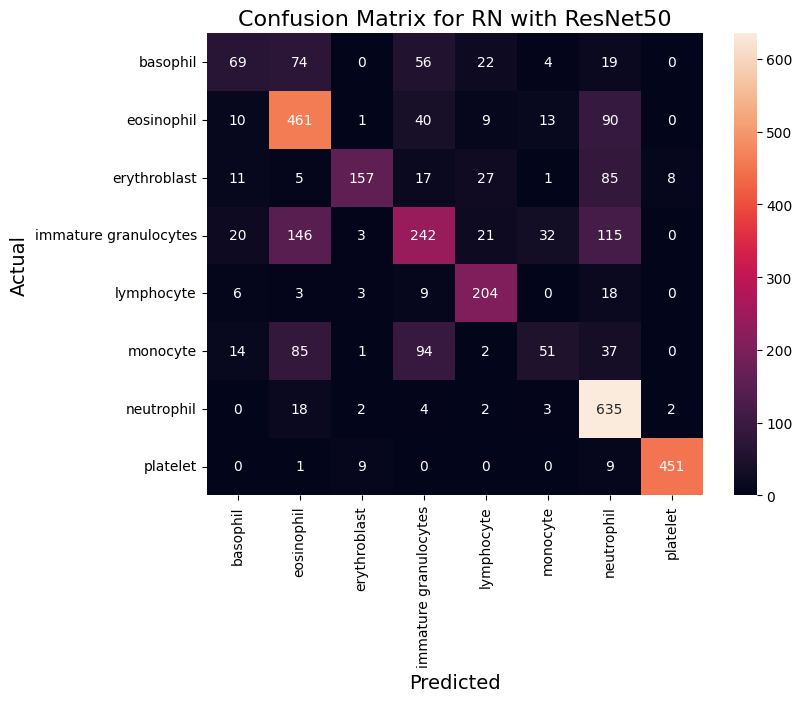

In [ ]:
ret5, ret_model5, ret_hist5 = setup_RESNET_model(units=1024, drop_out=0, batch_size=64, epochs=30, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model5.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model5.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoTraining_units_1024_epoch_30_batch_size_64_n_test_0_optimizer_Adam")

In [ ]:
report_class= classification_report(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model5.predict(X_test), axis = 1).flatten())
print(report_class)

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
              precision    recall  f1-score   support

           0       0.53      0.28      0.37       244
           1       0.58      0.74      0.65       624
           2       0.89      0.50      0.64       311
           3       0.52      0.42      0.46       579
           4       0.71      0.84      0.77       243
           5       0.49      0.18      0.26       284
           6       0.63      0.95      0.76       666
           7       0.98      0.96      0.97       470

    accuracy                           0.66      3421
   macro avg       0.67      0.61      0.61      3421
weighted avg       0.66      0.66      0.64      3421



### Loss History

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


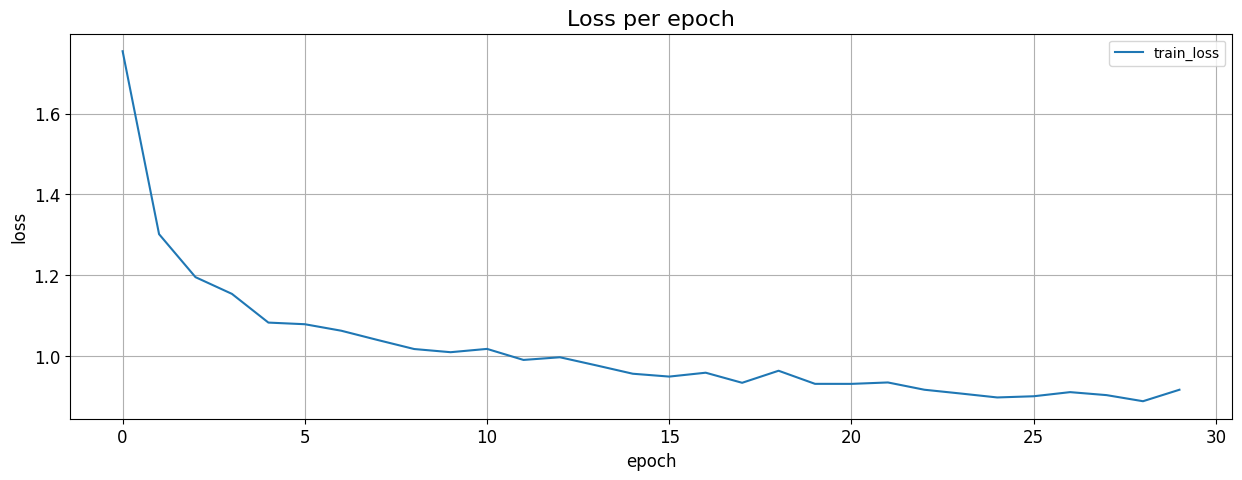

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':ret_hist5.history['loss']})
plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch.png', format='png', bbox_inches="tight")
plt.show()

In [ ]:
ret_hist5.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


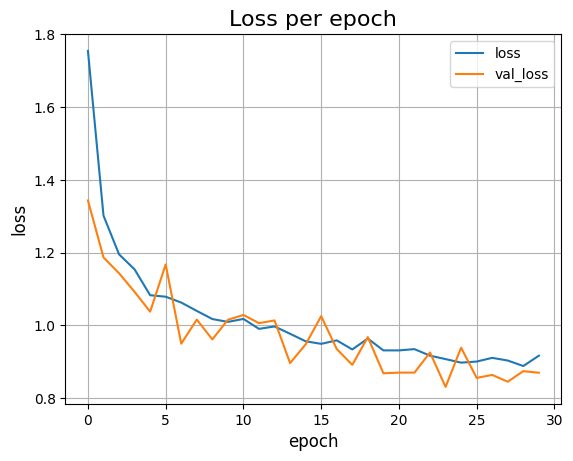

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist5.history['loss']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist5.history['val_loss']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='loss')
plt.plot(plot_df2,  label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch.png', format='png', bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


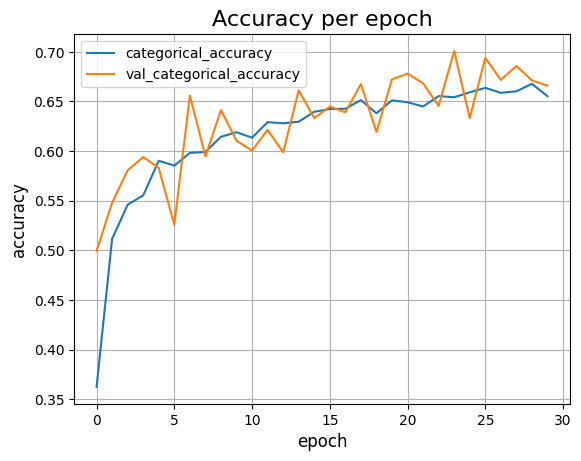

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist5.history['categorical_accuracy']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist5.history['val_categorical_accuracy']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='categorical_accuracy')
plt.plot(plot_df2,  label='val_categorical_accuracy')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Accuracy per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch.png', format='png', bbox_inches="tight")
plt.show()


### Execution 06

 **Replica paper**

- Unit = 1024
- Batch size = 64
- Epoch = 100

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=128, Epochs=100
Epoch 1/100
94/94 [==============================] - 8s 46ms/step - loss: 2.0278 - categorical_accuracy: 0.3048 - val_loss: 1.5288 - val_categorical_accuracy: 0.3902
Epoch 2/100
94/94 [==============================] - 2s 22ms/step - loss: 1.4725 - categorical_accuracy: 0.4607 - val_loss: 1.3233 - val_categorical_accuracy: 0.5105
Epoch 3/100
94/94 [==============================] - 2s 20ms/step - loss: 1.2961 - categorical_accuracy: 0.5146 - val_loss: 1.1797 - val_categorical_accuracy: 0.5619
Epoch 4/100
94/94 [==============================] - 2s 21ms/step - loss: 1.1751 - categorical_accuracy: 0.5710 - val_loss: 1.2143 - val_categorical_accuracy: 0.5018
Epoch 5/100
94/94 [==============================] - 2s 20ms/step - loss: 1.1574 - categorical_accuracy: 0.5668 - val_loss: 1.0534 - val_categorical_accuracy: 0.6069
Epoch 6/

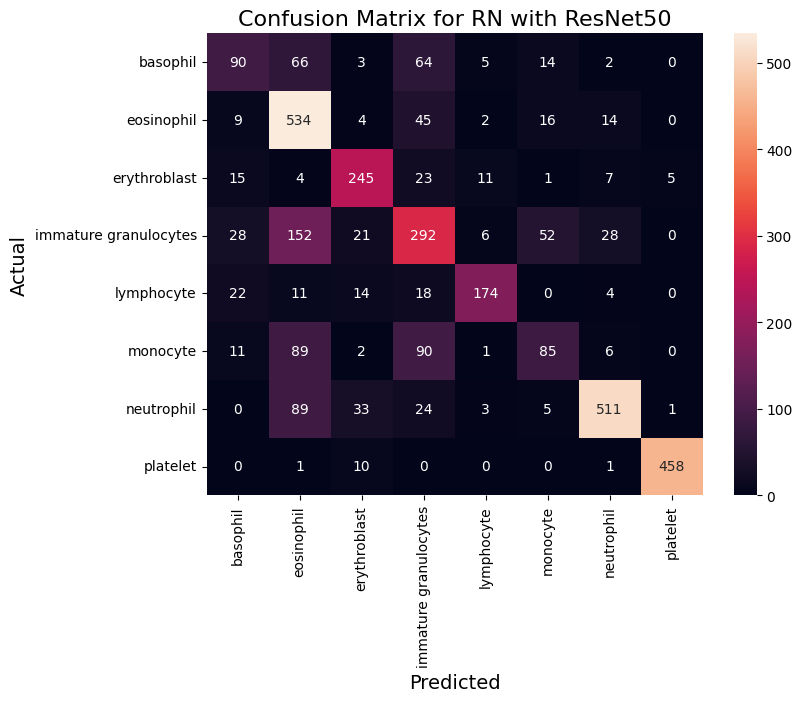

In [ ]:
ret6, ret_model6, ret_hist6 = setup_RESNET_model(units=1024, drop_out=0, batch_size=128, epochs=100, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model6.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model6.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoTraining_units_1024_epoch_100_batch_size_128_n_test_0_optimizer_Adam")

### Treinamento da Resnet50

- Unit = 1024
- Batch size = 64
- Epoch = 5

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

def setup_RESNET2_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  model = tf.keras.models.Sequential()

  print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')


  model.add(ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3)))

  model.add(layers.Flatten())
  model.add(layers.Dense(units, activation=activation))
  model.add(layers.Dropout(drop_out))
  model.add(layers.Dense(8, activation = 'softmax'))

  model.layers[0].trainable = False

  model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = ['accuracy'],
          optimizer = tf.keras.optimizers.Adam()
          )

  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)

  # present the structure of model initialized
  model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
#   model_json = model.to_json()
#   dir_path = f'{path_drive}/ResNet'
#   name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
#   json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
#   json_file.write(model_json)
#   json_file.close()
#   model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=128, Epochs=30
Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.2299 - loss: 2.5280 - val_accuracy: 0.4504 - val_loss: 1.5017
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.4554 - loss: 1.4958 - val_accuracy: 0.4947 - val_loss: 1.3529
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.5074 - loss: 1.3104 - val_accuracy: 0.5129 - val_loss: 1.3719
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.5160 - loss: 1.2696 - val_accuracy: 0.5748 - val_loss: 1.1454
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - accuracy: 0.5717 - loss: 1.1502 - val_accuracy: 0.6022 - val_loss: 1.0645
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.5842 - loss: 1.0950 - val_accuracy: 0.5958 - val_loss: 1.0556
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,906,842 (114.09 MB)

 Trainable params: 2,106,376 (8.04 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,212,754 (16.07 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6335 - loss: 0.9611
test loss, test acc: [0.9403674602508545, 0.6498100161552429]
Model saved to disk
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step


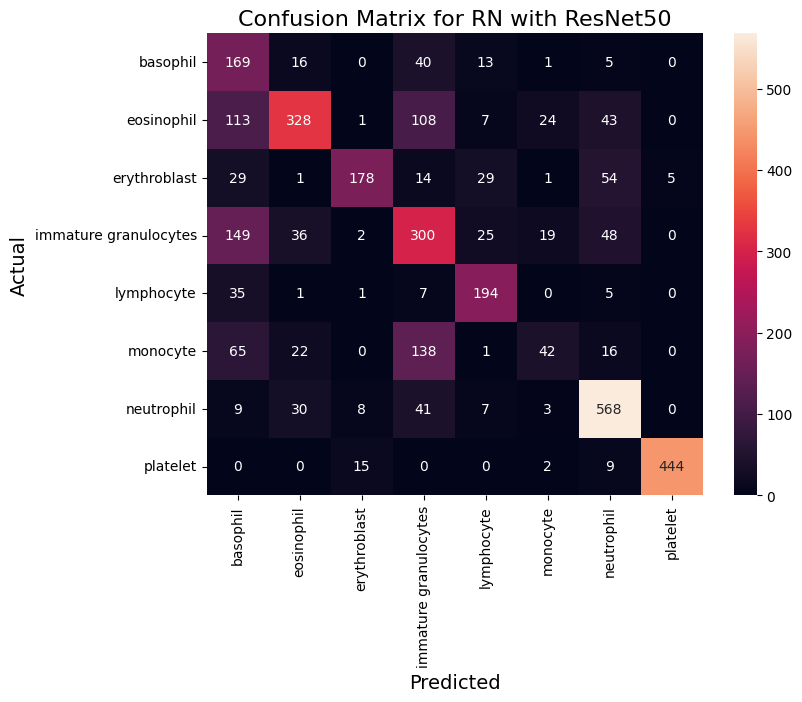

In [ ]:
ret62, ret_model62, ret_hist62 = setup_RESNET2_model(units=1024, drop_out=0, batch_size=128, epochs=30, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model62.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model62.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoDense_replica2_units_1024_epoch_100_batch_size_128_n_test_0_optimizer_Adam")

### Treinamento Resnet - terceira config

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

def setup_RESNET3_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  model = tf.keras.models.Sequential()

  print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')


  model.add(ResNet50(weights = 'imagenet', include_top = False, classes=8, input_shape = (32,32,3)))

  model.add(layers.Flatten())
  model.add(layers.Dense(units, activation=activation))
  model.add(layers.Dropout(drop_out))
  model.add(layers.Dense(8, activation = 'softmax'))

  # model.layers[0].trainable = False

  model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = ['categorical_accuracy'],
          optimizer = tf.keras.optimizers.Adam()
          )

  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)

  # present the structure of model initialized
  model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
#   model_json = model.to_json()
#   dir_path = f'{path_drive}/ResNet'
#   name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
#   json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
#   json_file.write(model_json)
#   json_file.close()
#   model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

kernel=(3,3), 5 filters kernel 
 algorithm sparse_categorical_crossentropy, option algorithm (1) loss and (2) optimizer = 1
Dropout=0, Batch_size=128, Epochs=10
Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 111s 895ms/step - categorical_accuracy: 0.7179 - loss: 1.0124 - val_categorical_accuracy: 0.0905 - val_loss: 6.4523
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 872ms/step - categorical_accuracy: 0.9031 - loss: 0.2882 - val_categorical_accuracy: 0.0905 - val_loss: 3.6888
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 874ms/step - categorical_accuracy: 0.9306 - loss: 0.2077 - val_categorical_accuracy: 0.1373 - val_loss: 3.6839
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 877ms/step - categorical_accuracy: 0.9439 - loss: 0.1541 - val_categorical_accuracy: 0.0905 - val_loss: 4.8493
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 873ms/step - categorical_accuracy: 0.9572 - loss: 0.1177 - val_categorical_accuracy: 0.0905 - val_loss: 4.5359
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 871ms/step - categorical_accura

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,976,026 (293.64 MB)

 Trainable params: 25,640,968 (97.81 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,281,938 (195.63 MB)

Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - categorical_accuracy: 0.1346 - loss: 15.2730
test loss, test acc: [15.187116622924805, 0.14323297142982483]
Model saved to disk
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step


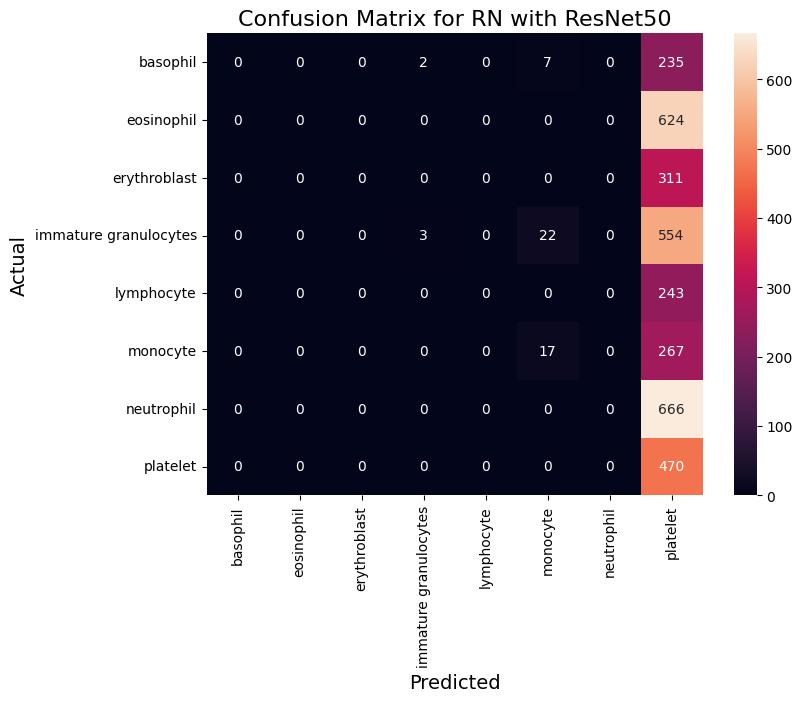

In [ ]:
ret63, ret_model63, ret_hist63 = setup_RESNET3_model(units=1024, drop_out=0, batch_size=128, epochs=10, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model63.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model63.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoDense_replica3_units_1024_epoch_100_batch_size_128_n_test_0_optimizer_Adam")

### Treinamento Resnet - quarta config

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

def setup_RESNET4_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  # model = tf.keras.models.Sequential()

  # print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')


  base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
  for layer in base_model.layers:
    layer.trainable = False

  x = layers.Flatten()(base_model.output)
  x = layers.Dense(units, activation='relu')(x)
  predictions = layers.Dense(8, activation = 'softmax')(x)

  model = Model(inputs = base_model.input, outputs = predictions)

  model.compile(
          loss  = tf.keras.losses.CategoricalCrossentropy(),
          metrics = ['categorical_accuracy'],
          optimizer = tf.keras.optimizers.Adam()
          )

  history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size)

  # present the structure of model initialized
  # model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
  # model_json = model.to_json()
  # dir_path = f'{path_drive}/ResNet'
  # name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
  # json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
  # json_file.write(model_json)
  # json_file.close()
  # model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

In [ ]:
ret65, ret_model65, ret_hist65 = setup_RESNET4_model(units=1024, drop_out=0, batch_size=128, epochs=5, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model65.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model65.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"NoDense_replica5_units_1024_epoch_5_batch_size_128_n_test_0_optimizer_Adam")

Dropout=0, Batch_size=128, Epochs=5
Epoch 1/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - categorical_accuracy: 0.2390 - loss: 2.4746 - val_categorical_accuracy: 0.4036 - val_loss: 1.5475
Epoch 2/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - categorical_accuracy: 0.4583 - loss: 1.4949 - val_categorical_accuracy: 0.5456 - val_loss: 1.2788
Epoch 3/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - categorical_accuracy: 0.5000 - loss: 1.3328 - val_categorical_accuracy: 0.5088 - val_loss: 1.2673
Epoch 4/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - categorical_accuracy: 0.5519 - loss: 1.2059 - val_categorical_accuracy: 0.5648 - val_loss: 1.1362
Epoch 5/5
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 131ms/step - categorical_accuracy: 0.5903 - loss: 1.1296 - val_categorical_accuracy: 0.5981 - val_loss: 1.1161
Evaluate on test data
107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - categorical_accuracy: 0.5555 - loss: 1.1887
test loss, test acc: [1.1525365114212036, 0.5799474120140076]


FileNotFoundError: [Errno 2] No such file or directory: './Imagens/ResNet/JSON//model_n1_algorithm_sparse_categorical_crossentropy_1024_units_0_drop_out_128_batch_size_5_epocs.json'

### Training Paper - 1

Dropout=0, Batch_size=128, Epochs=100
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - categorical_accuracy: 0.2511 - loss: 2.3368 - val_categorical_accuracy: 0.5298 - val_loss: 1.4956
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - categorical_accuracy: 0.4587 - loss: 1.4830 - val_categorical_accuracy: 0.5152 - val_loss: 1.2710
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - categorical_accuracy: 0.5200 - loss: 1.2862 - val_categorical_accuracy: 0.5754 - val_loss: 1.1422
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - categorical_accuracy: 0.5689 - loss: 1.1714 - val_categorical_accuracy: 0.6057 - val_loss: 1.0774
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 129ms/step - categorical_accuracy: 0.5596 - loss: 1.1544 - val_categorical_accuracy: 0.6127 - val_loss: 1.0620
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - categorical_accuracy: 0.5813 - loss: 1.1059 - val_categorical_accuracy: 0.6332 - val_loss: 1.0319
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━

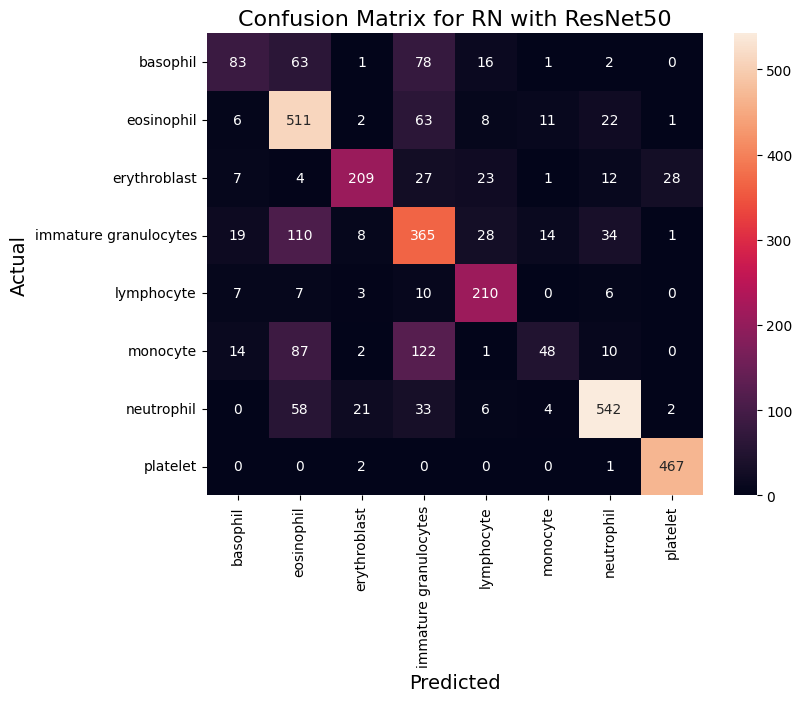

In [ ]:
ret_replica, ret_model_replica, ret_hist_replica = setup_RESNET4_model(units=1024, drop_out=0, batch_size=128, epochs=100, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"Replica_paper_resnet_100_epochs_no_normalized")

In [ ]:
report_class= classification_report(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten())
print(report_class)

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
              precision    recall  f1-score   support

           0       0.61      0.34      0.44       244
           1       0.61      0.82      0.70       624
           2       0.84      0.67      0.75       311
           3       0.52      0.63      0.57       579
           4       0.72      0.86      0.79       243
           5       0.61      0.17      0.26       284
           6       0.86      0.81      0.84       666
           7       0.94      0.99      0.96       470

    accuracy                           0.71      3421
   macro avg       0.71      0.66      0.66      3421
weighted avg       0.72      0.71      0.70      3421



#### Comparando amostras diferentes

In [ ]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred = ret_model_replica.predict(X_test)
subset_y_pred_flatten = np.argmax(subset_y_pred, axis = 1).flatten()

difs_list = subset_y_pred_flatten - np.argmax(y_test, axis = 1).flatten()
difs_list = np.where(difs_list != 0)[0]
print(difs_list)

subset_x_test = []
subset_y_test = []
for i in range(0, 6, 1):
  subset_x_test.append( X_test[difs_list[i]] )
  subset_y_test.append( np.argmax(y_test, axis = 1).flatten()[difs_list[i]] )

print(subset_y_pred)
print(subset_y_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step
[   0    1    3    9   14   23   24   30   33   36   37   48   50   53
   54   55   58   62   65   72   77   80   81   82   84   88   95  101
  102  105  107  108  112  115  116  118  120  126  131  132  133  141
  142  148  154  160  161  174  179  180  189  194  198  202  208  210
  213  217  219  225  228  232  240  243  244  246  249  261  268  274
  277  278  281  283  286  288  290  294  297  300  302  320  323  324
  325  328  331  334  335  340  341  342  346  348  353  362  368  370
  371  372  374  377  378  379  384  387  390  394  395  398  400  403
  405  413  415  418  419  422  426  430  432  433  436  441  444  449
  454  462  472  476  480  481  486  492  495  496  497  499  500  501
  505  508  509  516  517  519  520  530  531  533  535  537  540  541
  543  545  552  559  563  564  565  571  575  576  578  579  580  586
  591  593  594  595  598  602  608  614  616  618  619  621  622  626
  633  634  635  637  638  640  645

In [ ]:
list_probs_samples = []
for i in range(0, 5, 1):
  list_probs_samples.append(subset_y_pred[difs_list[i]])

for i in range(0, 5, 1):
  print(list_probs_samples[i].round(3))

[0.037 0.625 0.    0.198 0.    0.105 0.035 0.   ]
[0.126 0.458 0.002 0.29  0.002 0.122 0.    0.   ]
[0.002 0.03  0.02  0.126 0.001 0.007 0.813 0.001]
[0.068 0.218 0.035 0.468 0.051 0.019 0.14  0.   ]
[0.259 0.12  0.061 0.387 0.127 0.042 0.003 0.   ]


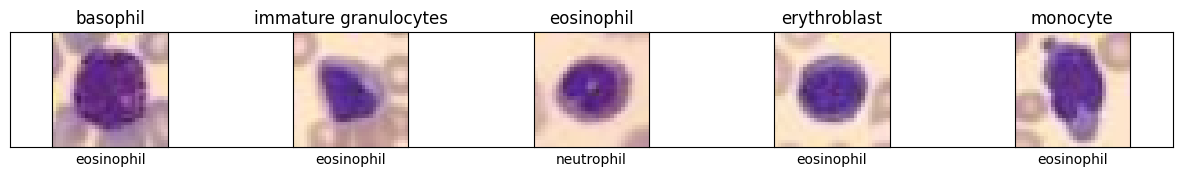

In [ ]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{dict_classes[str(subset_y_test[j])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred_flatten[j])]}')
# plt.set_axis_off()
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

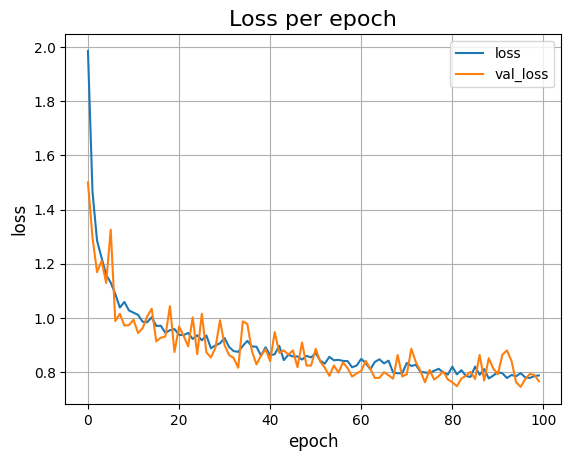

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['loss']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['val_loss']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='loss')
plt.plot(plot_df2,  label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

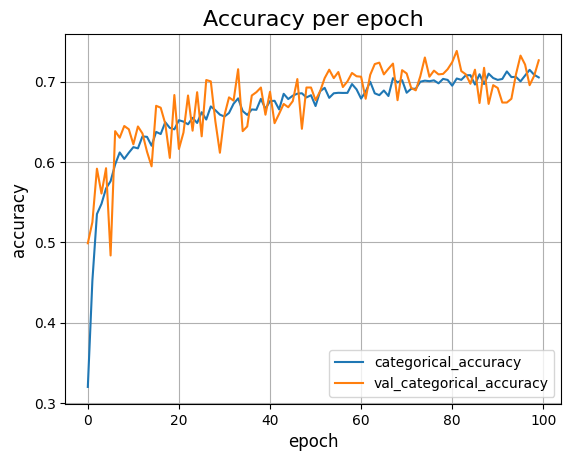

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['categorical_accuracy']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['val_categorical_accuracy']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='categorical_accuracy')
plt.plot(plot_df2,  label='val_categorical_accuracy')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Accuracy per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()


### Training Paper - 2

Dropout=0, Batch_size=128, Epochs=100
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/100
94/94 [==============================] - 59s 566ms/step - loss: 1.9890 - categorical_accuracy: 0.3035 - val_loss: 1.5177 - val_categorical_accuracy: 0.4842
Epoch 2/100
94/94 [==============================] - 59s 630ms/step - loss: 1.4840 - categorical_accuracy: 0.4496 - val_loss: 1.3510 - val_categorical_accuracy: 0.5035
Epoch 3/100
94/94 [==============================] - 57s 603ms/step - loss: 1.3033 - categorical_accuracy: 0.5325 - val_loss: 1.2207 - val_categorical_accuracy: 0.5175
Epoch 4/100
94/94 [==============================] - 58s 623ms/step - loss: 1.2095 - categorical_accuracy: 0.5500 - val_loss: 1.1796 - val_categorical_accuracy: 0.5759
Epoch 5/100
94/94 [==============================] - 56s 602ms/step - loss: 1.1685 - categorical_accuracy: 0.5598 - val_loss: 1.1360 - val_categorical_accuracy: 0.5496
Epoch 6/100
94/94 [==============================] - 60s 

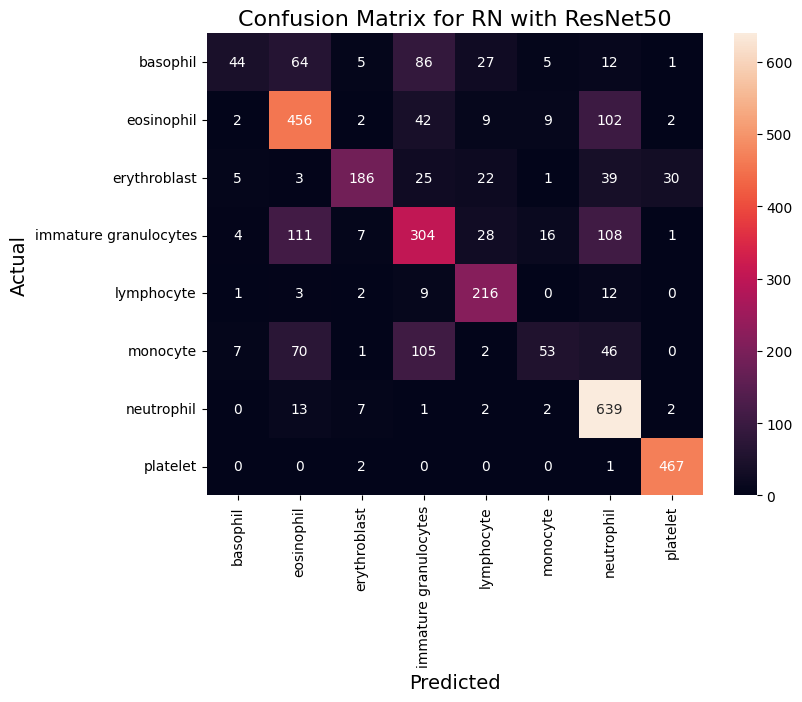

In [ ]:
ret_replica2, ret_model_replica2, ret_hist_replica2 = setup_RESNET4_model(units=1024, drop_out=0, batch_size=128, epochs=100, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica2.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica2.predict(X_test), axis = 1).flatten(),
                  f"RN with ResNet50", show_plot=False, cm=cm2,
                  details=f"Replica_paper_resnet_100_epochs_no_normalized")

In [ ]:
report_class= classification_report(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica2.predict(X_test), axis = 1).flatten())
print(report_class)

107/107 [==============================] - 15s 138ms/step
              precision    recall  f1-score   support

           0       0.70      0.18      0.29       244
           1       0.63      0.73      0.68       624
           2       0.88      0.60      0.71       311
           3       0.53      0.53      0.53       579
           4       0.71      0.89      0.79       243
           5       0.62      0.19      0.29       284
           6       0.67      0.96      0.79       666
           7       0.93      0.99      0.96       470

    accuracy                           0.69      3421
   macro avg       0.71      0.63      0.63      3421
weighted avg       0.69      0.69      0.66      3421



#### Comparando amostras diferentes

In [ ]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred = ret_model_replica2.predict(X_test)
subset_y_pred_flatten = np.argmax(subset_y_pred, axis = 1).flatten()

difs_list = subset_y_pred_flatten - np.argmax(y_test, axis = 1).flatten()
difs_list = np.where(difs_list != 0)[0]
print(difs_list)

subset_x_test = []
subset_y_test = []
for i in range(0, 5, 1):
  subset_x_test.append( X_test[difs_list[i]] )
  subset_y_test.append( np.argmax(y_test, axis = 1).flatten()[difs_list[i]] )

print(subset_y_pred)
print(subset_y_test)

NameError: name 'ret_model_replica2' is not defined

In [ ]:
list_probs_samples = []
for i in range(0, 5, 1):
  list_probs_samples.append(subset_y_pred[difs_list[i]])

for i in range(0, 5, 1):
  print(list_probs_samples[i].round(3))

[0.006 0.55  0.    0.158 0.    0.099 0.186 0.   ]
[0.044 0.52  0.008 0.285 0.002 0.14  0.001 0.   ]
[0.    0.002 0.004 0.011 0.    0.001 0.982 0.   ]
[0.006 0.194 0.067 0.036 0.005 0.098 0.543 0.051]
[0.018 0.189 0.06  0.288 0.047 0.019 0.38  0.   ]


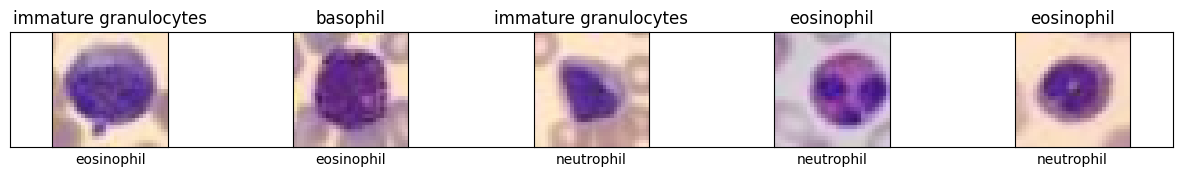

In [ ]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j-1]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        # print(str(subset_y_test2[j]))
        plt.title(f'{dict_classes[str(subset_y_test[j-1])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred_flatten[difs_list[j-1]])]}')
        # print(subset_y_pred2_flatten[difs_list[j-1]])
# plt.set_axis_off()
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

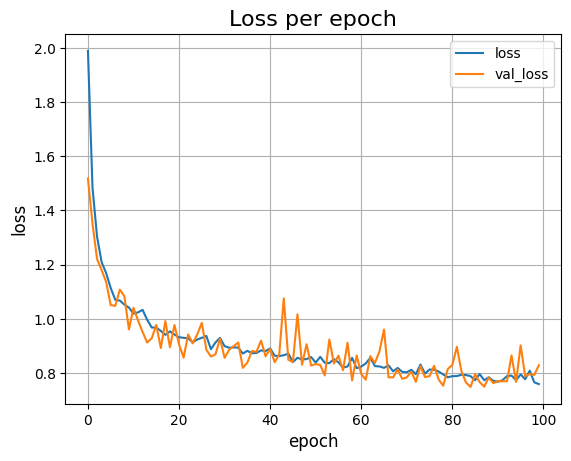

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica2.history['loss']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica2.history['val_loss']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='loss')
plt.plot(plot_df2,  label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

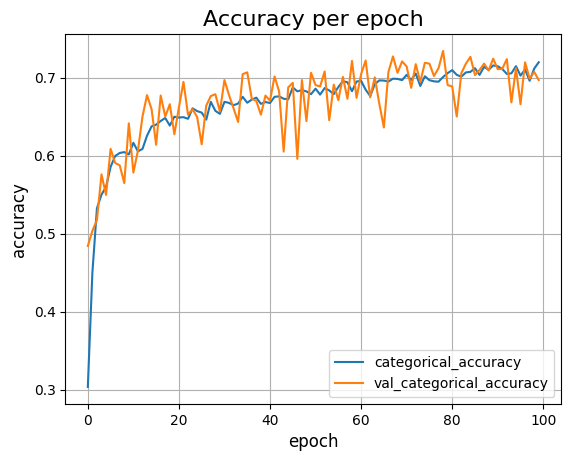

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica2.history['categorical_accuracy']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica2.history['val_categorical_accuracy']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='categorical_accuracy')
plt.plot(plot_df2,  label='val_categorical_accuracy')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Accuracy per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()


### Training with Alexnet

In [ ]:
y_train_sparse  = data_train.labels.flatten()
y_val_sparse    = data_val.labels.flatten()
y_test_sparse   = data_test.labels.flatten()

In [ ]:
from tensorflow.keras import datasets, layers, models, losses, Model

def setup_alexnet_model(units=1024, drop_out=0, batch_size=64, epochs=5, n=1,
                    algorithm='sparse_categorical_crossentropy',
                    qtd_kernel=15, height_k=3, width_k=3, activation='relu'):
  # model = tf.keras.models.Sequential()

  # print(f'kernel=({height_k},{width_k}), {qtd_kernel} filters kernel \n algorithm {algorithm}, option algorithm (1) loss and (2) optimizer = {n}')
  print(f'Dropout={drop_out}, Batch_size={batch_size}, Epochs={epochs}')

  # model.add(tf.keras.layers.Conv2D(qtd_kernel, kernel_size=(height_k, width_k),
  #                                   activation='relu', input_shape=(28, 28, 3)))
  # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model = tf.keras.models.Sequential()

  # Architecture of alexnet without strides
  model.add(layers.Conv2D(filters=128, kernel_size=(11,11), activation='relu', input_shape=(32,32,3)) )
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(filters=256, kernel_size=(5,5),  activation='relu', padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((3,3)))

  model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding="same"))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=256, kernel_size=(1,1),  activation='relu', padding="same"))
  model.add(layers.BatchNormalization())

  model.add(layers.Conv2D(filters=256, kernel_size=(1,1),  activation='relu', padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(1024,activation='relu'))
  model.add(layers.Dropout(0.5))

  model.add(layers.Dense(1024,activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(8,activation='softmax'))

  model.compile(
          loss='sparse_categorical_crossentropy',
          metrics = ['accuracy'],
          optimizer = tf.keras.optimizers.Adam()
          )

  history = model.fit(X_train, y_train_sparse, epochs=epochs, validation_data=(X_val, y_val_sparse), batch_size=batch_size)

  # present the structure of model initialized
  # model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test_sparse)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
  # model_json = model.to_json()
  # dir_path = f'{path_drive}/ResNet'
  # name_file= f'/model_n{n}_algorithm_{algorithm}_{units}_units_{drop_out}_drop_out_{batch_size}_batch_size_{epochs}_epocs'
  # json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
  # json_file.write(model_json)
  # json_file.close()
  # model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

### Training Paper - alex net

Dropout=0, Batch_size=128, Epochs=100


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)             │ (None, 22, 22, 128)    │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,104 (184.00 KB)

 Trainable params: 46,848 (183.00 KB)

 Non-trainable params: 256 (1.00 KB)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)             │ (None, 22, 22, 128)    │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 11, 11, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 867,584 (3.31 MB)

 Trainable params: 866,816 (3.31 MB)

 Non-trainable params: 768 (3.00 KB)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)             │ (None, 22, 22, 128)    │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 11, 11, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 3, 3, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 3, 3, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,592,320 (6.07 MB)

 Trainable params: 1,590,016 (6.07 MB)

 Non-trainable params: 2,304 (9.00 KB)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_102 (Conv2D)             │ (None, 22, 22, 128)    │        46,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_102         │ (None, 22, 22, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 11, 11, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_103         │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 3, 3, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_104         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 3, 3, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_105         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 3, 3, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_106         │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 1, 1, 256)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,592,320 (6.07 MB)

 Trainable params: 1,590,016 (6.07 MB)

 Non-trainable params: 2,304 (9.00 KB)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 254ms/step - accuracy: 0.5719 - loss: 1.2020 - val_accuracy: 0.1373 - val_loss: 5.3486
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.7873 - loss: 0.5696 - val_accuracy: 0.1449 - val_loss: 4.4100
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 277ms/step - accuracy: 0.8360 - loss: 0.4589 - val_accuracy: 0.2856 - val_loss: 5.0458
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 259ms/step - accuracy: 0.8579 - loss: 0.3889 - val_accuracy: 0.3446 - val_loss: 5.6682
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.8714 - loss: 0.3504 - val_accuracy: 0.3113 - val_loss: 2.3333
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - accuracy: 0.8896 - loss: 0.3158 - val_accuracy: 0.2430 - val_loss: 4.7792
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 266ms/step - accuracy: 0.8935 - loss: 0.2882 - val_accuracy: 0.5193 - val_loss: 2.0045
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 267ms/step - accuracy: 0.9053 - loss: 0.2527 - 

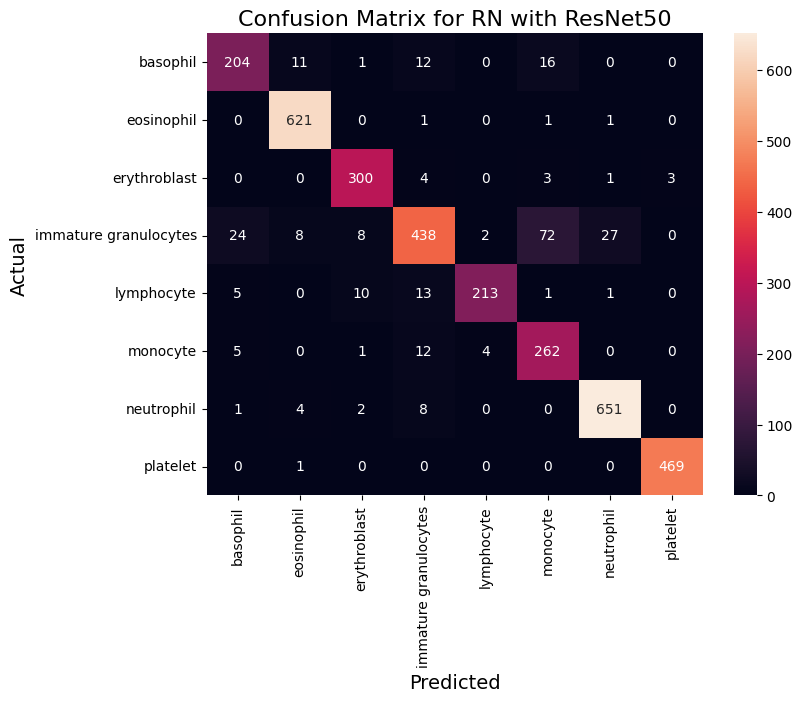

In [ ]:
ret_replica, ret_model_replica, ret_hist_replica = setup_alexnet_model(units=1024, drop_out=0, batch_size=128, epochs=100, n=1,
                                                        algorithm='sparse_categorical_crossentropy',
                                                        qtd_kernel=5, height_k=3, width_k=3, activation='relu')
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten(),
                  f"RN with AlexNet", show_plot=False, cm=cm2,
                  details=f"Replica_paper_alexnet_100_epochs_no_normalized")

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


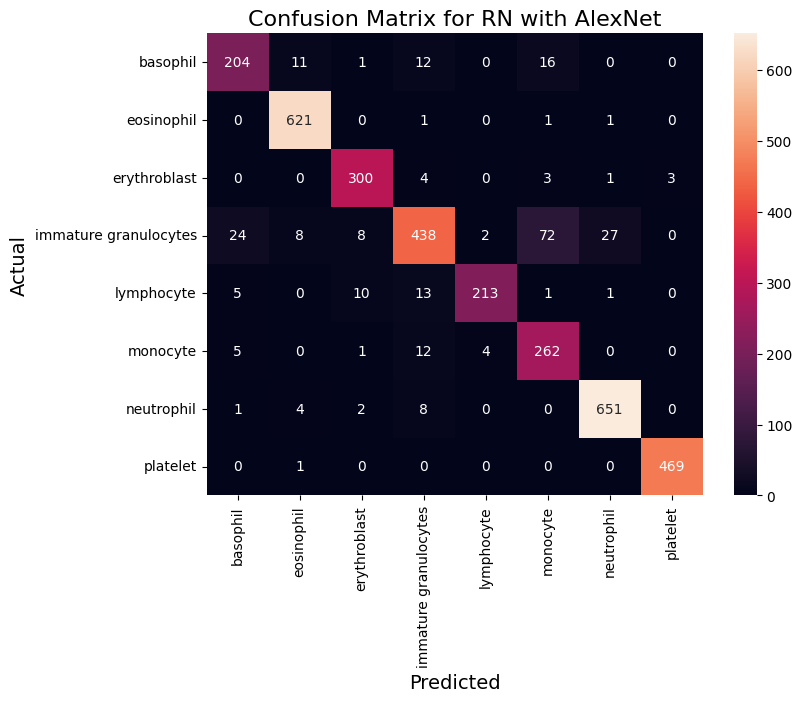

In [ ]:
cm2=confusion_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten())
cm2
plot_conf_matrix(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten(),
                  f"RN with AlexNet", show_plot=False, cm=cm2,
                  details=f"Replica_paper_alexnet_100_epochs_no_normalized")

In [ ]:
report_class= classification_report(np.argmax(y_test, axis = 1).flatten(), np.argmax(ret_model_replica.predict(X_test), axis = 1).flatten())
print(report_class)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       244
           1       0.96      1.00      0.98       624
           2       0.93      0.96      0.95       311
           3       0.90      0.76      0.82       579
           4       0.97      0.88      0.92       243
           5       0.74      0.92      0.82       284
           6       0.96      0.98      0.97       666
           7       0.99      1.00      1.00       470

    accuracy                           0.92      3421
   macro avg       0.91      0.92      0.91      3421
weighted avg       0.93      0.92      0.92      3421



#### Comparando amostras diferentes

In [ ]:
### Block used to evaluate the not wrong predictions individually
subset_y_pred2 = ret_model_replica.predict(X_test)
subset_y_pred2_flatten = np.argmax(subset_y_pred2, axis = 1).flatten()

difs_list2 = subset_y_pred2_flatten - y_test_sparse.flatten()
difs_list2 = np.where(difs_list2 != 0)[0]
print(difs_list2)

subset_x_test2 = []
subset_y_test2 = []
for i in range(0, 5, 1):
  subset_x_test2.append( X_test[difs_list2[i]] )
  print(difs_list2[i])
  subset_y_test2.append( y_test.flatten()[difs_list2[i]] )

print(subset_y_pred2_flatten)
print(subset_y_test2)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


ValueError: operands could not be broadcast together with shapes (3421,) (27368,) 

In [ ]:
list_probs_samples = []
for i in range(0, 5, 1):
  list_probs_samples.append(subset_y_pred[difs_list[i]])

for i in range(0, 5, 1):
  print(list_probs_samples[i].round(3))

[0.037 0.625 0.    0.198 0.    0.105 0.035 0.   ]
[0.126 0.458 0.002 0.29  0.002 0.122 0.    0.   ]
[0.002 0.03  0.02  0.126 0.001 0.007 0.813 0.001]
[0.068 0.218 0.035 0.468 0.051 0.019 0.14  0.   ]
[0.259 0.12  0.061 0.387 0.127 0.042 0.003 0.   ]


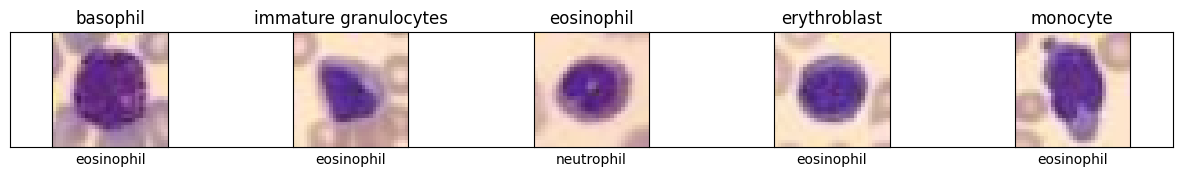

In [ ]:
#  Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(15, 1.5))
plt.xticks([])
plt.yticks([])

for i in range(1, 2, 1):
    for j in range(1, 6, 1):
        fig.add_subplot(1, 5, j)
        plt.imshow(X_test[difs_list[j]], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        plt.title(f'{dict_classes[str(subset_y_test[j])]}')
        plt.xlabel(f'{dict_classes[str(subset_y_pred_flatten[j])]}')
# plt.set_axis_off()
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_test_samples_images_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

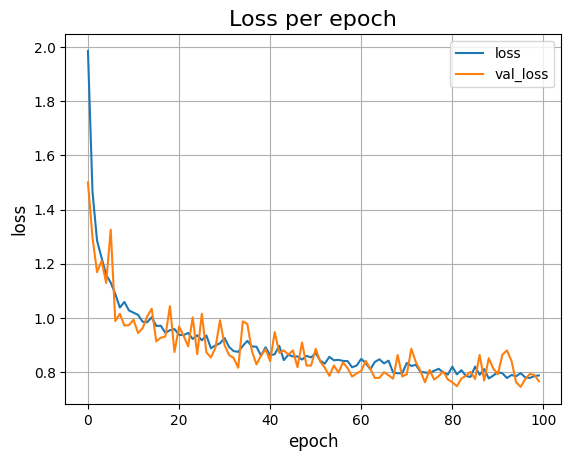

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['loss']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['val_loss']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='loss')
plt.plot(plot_df2,  label='val_loss')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_loss_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()

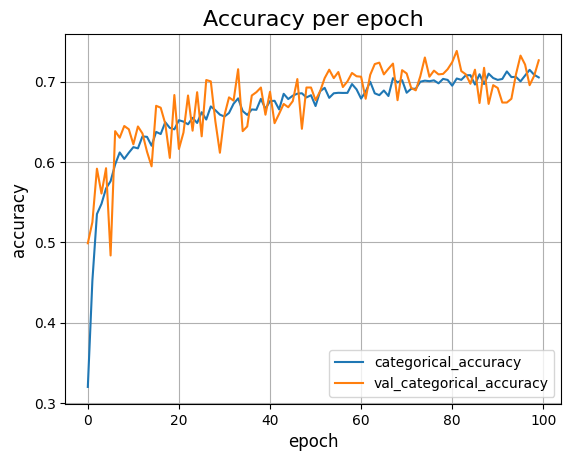

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['categorical_accuracy']})
plot_df2 = pd.DataFrame.from_dict({'train_acc':ret_hist_replica.history['val_categorical_accuracy']})
# plot_df.plot(logy=False, figsize=(15,5), fontsize=12)
# plot_df2.plot(logy=False, figsize=(15,5), fontsize=12)

plt.plot(plot_df, label='categorical_accuracy')
plt.plot(plot_df2,  label='val_categorical_accuracy')
plt.legend(loc='best')
plt.xlabel('epoch', fontsize=12)
plt.ylabel('accuracy', fontsize=12)
plt.title('Accuracy per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/ResNet/fig_acc_per_epoch_100_epochs.png', format='png', bbox_inches="tight")
plt.show()
